1. Test Environment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

print("Environment OK")

Environment OK


2. Load Dataset

In [3]:
import kagglehub

path = kagglehub.dataset_download(
    "alexteboul/diabetes-health-indicators-dataset"
)

print("Dataset path:", path)

Dataset path: C:\Users\maunu\.cache\kagglehub\datasets\alexteboul\diabetes-health-indicators-dataset\versions\1


In [4]:
import os
import pandas as pd

files = os.listdir(path)
files

['diabetes_012_health_indicators_BRFSS2015.csv',
 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv',
 'diabetes_binary_health_indicators_BRFSS2015.csv']

In [5]:
csv_path = os.path.join(path, files[0])
df = pd.read_csv(csv_path)

df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


3. Cek Ukuran dan Struktur Data

In [6]:
df.shape

(253680, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


4. Distribusi Label

In [10]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [11]:
# Konversi label 3-kelas menjadi biner
df["Diabetes_binary"] = df["Diabetes_012"].apply(lambda x: 0 if x == 0 else 1)

# Cek distribusi label baru
df["Diabetes_binary"].value_counts()

Diabetes_binary
0    213703
1     39977
Name: count, dtype: int64

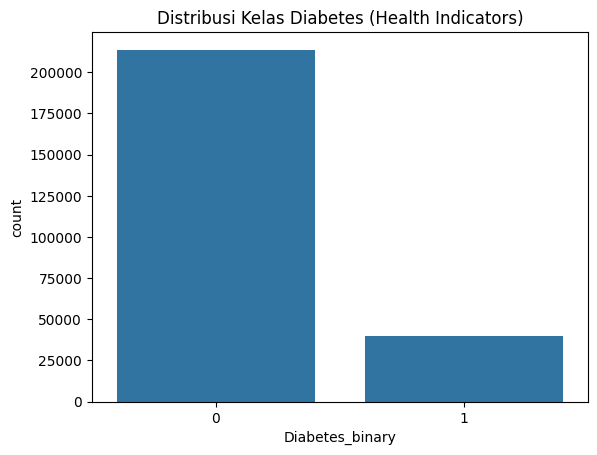

In [12]:
sns.countplot(x="Diabetes_binary", data=df)
plt.title("Distribusi Kelas Diabetes (Health Indicators)")
plt.show()

6. Pisahkan Fitur dan Label

In [13]:
# Label biner yang sudah kita buat
y = df["Diabetes_binary"]

# Fitur: buang kolom label lama & label baru
X = df.drop(columns=["Diabetes_012", "Diabetes_binary"])

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (253680, 21)
Shape y: (253680,)


7. Split Data Train-Test

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (202944, 21)
Test: (50736, 21)


8. Scaling Fitur (StandardScaler)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

X_train_sc[:5]

array([[ 1.15358604,  1.16515811,  0.19747442, -0.0587659 , -0.89294367,
        -0.20512059,  3.10301131, -1.76260174,  0.7588142 ,  0.482023  ,
        -0.24332423,  0.22735928,  3.31288648,  1.3965909 , -0.42921312,
         0.08781163,  2.22263676,  1.12965774,  1.62398844, -0.05166095,
        -0.02593998],
       [-0.86686209, -0.85825262,  0.19747442, -0.66396404, -0.89294367,
        -0.20512059, -0.3222676 ,  0.56734314, -1.31784566,  0.482023  ,
        -0.24332423,  0.22735928, -0.30185157,  0.45961139,  0.24602686,
         0.661519  , -0.44991607,  1.12965774, -0.01187659,  0.96288127,
         0.93973262],
       [ 1.15358604,  1.16515811,  0.19747442,  3.26982392,  1.11989147,
        -0.20512059,  3.10301131, -1.76260174, -1.31784566,  0.482023  ,
        -0.24332423,  0.22735928, -0.30185157,  1.3965909 , -0.15911713,
         1.1204849 ,  2.22263676, -0.88522388, -0.01187659, -1.06620317,
        -0.99161259],
       [-0.86686209, -0.85825262,  0.19747442,  3.11852438

9. Training MLP

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_mlp = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_sc.shape[1],)),
    Dropout(0.4),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model_mlp.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_mlp.summary()

e:\Aunul_Data\Documents\Semester 7\Kelas Praktikum Semester 7\Machine Learning\Demo Program\uap-ml-diabetes-tabular\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
e:\Aunul_Data\Documents\Semester 7\Kelas Praktikum Semester 7\Machine Learning\Demo Program\uap-ml-diabetes-tabular\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

10. Training dengan Epoch

In [17]:
history_mlp = model_mlp.fit(
    X_train_sc, y_train,
    validation_split=0.2,
    epochs=20,        # cukup untuk dataset besar
    batch_size=256,   # lebih efisien di CPU
    verbose=1
)

Epoch 1/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8408 - loss: 0.3723 - val_accuracy: 0.8512 - val_loss: 0.3389
Epoch 2/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8449 - loss: 0.3524 - val_accuracy: 0.8526 - val_loss: 0.3383
Epoch 3/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8462 - loss: 0.3492 - val_accuracy: 0.8531 - val_loss: 0.3363
Epoch 4/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8469 - loss: 0.3475 - val_accuracy: 0.8539 - val_loss: 0.3360
Epoch 5/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8470 - loss: 0.3458 - val_accuracy: 0.8548 - val_loss: 0.3349
Epoch 6/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8471 - loss: 0.3454 - val_accuracy: 0.8528 - val_loss: 0.3362
Epoch 7/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8474 - loss: 0.3451 - val_accuracy: 0.8529 - val_loss: 0.3354
Epoch 8/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8480 - loss: 0.3444 - val_accuracy: 0.

11. Grafik Loss dan Accuracy

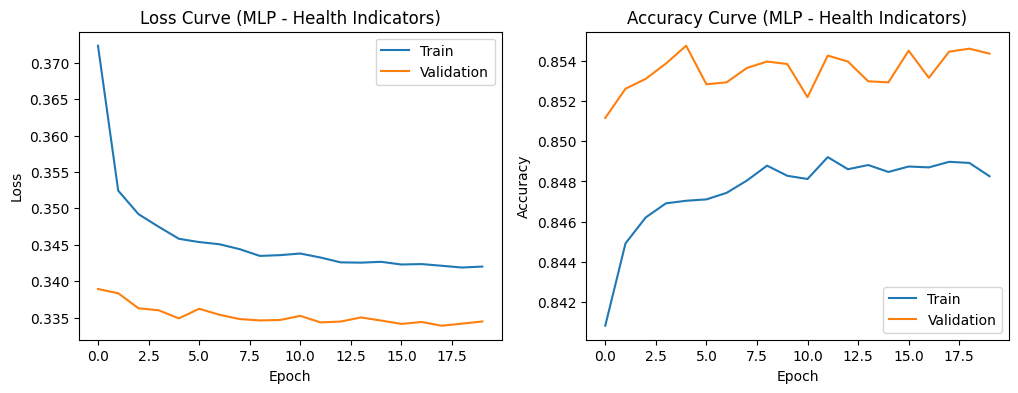

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_mlp.history["loss"], label="Train")
plt.plot(history_mlp.history["val_loss"], label="Validation")
plt.title("Loss Curve (MLP - Health Indicators)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_mlp.history["accuracy"], label="Train")
plt.plot(history_mlp.history["val_accuracy"], label="Validation")
plt.title("Accuracy Curve (MLP - Health Indicators)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

12. Evaluasi Model dengan Metrik

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_mlp = (model_mlp.predict(X_test_sc) > 0.5).astype(int)

print("Classification Report (Health - MLP)")
print(classification_report(y_test, y_pred_mlp))

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step
Classification Report (Health - MLP)
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42741
           1       0.61      0.16      0.26      7995

    accuracy                           0.85     50736
   macro avg       0.73      0.57      0.59     50736
weighted avg       0.82      0.85      0.81     50736



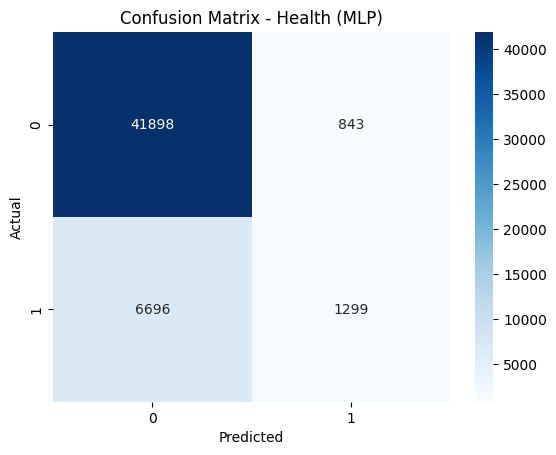

In [22]:
cm = confusion_matrix(y_test, y_pred_mlp)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Health (MLP)")
plt.show()

13. Import dan Siapkan Data

In [27]:
import numpy as np
import torch
from pytorch_tabnet.tab_model import TabNetClassifier

In [28]:
X_train_tab = X_train_sc.astype(np.float32)
X_test_tab  = X_test_sc.astype(np.float32)

y_train_tab = y_train.values
y_test_tab  = y_test.values

14. Bangun dan Training Model TabNet

In [29]:
tabnet = TabNetClassifier(
    n_d=16,
    n_a=16,
    n_steps=5,
    gamma=1.5,
    n_independent=2,
    n_shared=2,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type="entmax",
    device_name="cpu",
    verbose=10
)

e:\Aunul_Data\Documents\Semester 7\Kelas Praktikum Semester 7\Machine Learning\Demo Program\uap-ml-diabetes-tabular\.venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [30]:
tabnet.fit(
    X_train_tab, y_train_tab,
    eval_set=[(X_test_tab, y_test_tab)],
    eval_name=["valid"],
    eval_metric=["accuracy"],
    max_epochs=30,
    patience=5,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

epoch 0  | loss: 0.39434 | valid_accuracy: 0.84475 |  0:00:16s
epoch 10 | loss: 0.34372 | valid_accuracy: 0.84987 |  0:02:35s
epoch 20 | loss: 0.34028 | valid_accuracy: 0.8516  |  0:04:46s

Early stopping occurred at epoch 29 with best_epoch = 24 and best_valid_accuracy = 0.85206


e:\Aunul_Data\Documents\Semester 7\Kelas Praktikum Semester 7\Machine Learning\Demo Program\uap-ml-diabetes-tabular\.venv\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


15. Evaluasi Model TabNet

In [31]:
y_pred_tab = tabnet.predict(X_test_tab)

print("Classification Report (Health - TabNet)")
print(classification_report(y_test_tab, y_pred_tab))

Classification Report (Health - TabNet)
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42741
           1       0.63      0.14      0.23      7995

    accuracy                           0.85     50736
   macro avg       0.75      0.56      0.58     50736
weighted avg       0.82      0.85      0.81     50736



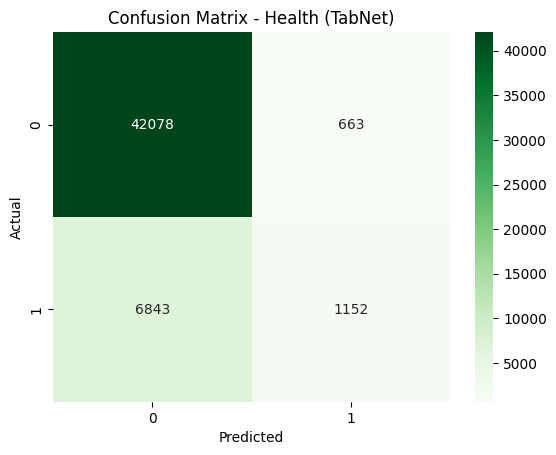

In [32]:
cm_tab = confusion_matrix(y_test_tab, y_pred_tab)

sns.heatmap(cm_tab, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Health (TabNet)")
plt.show()

16. Import dan Siapkan Data

In [33]:
import torch
import numpy as np

In [34]:
X_train_t = torch.tensor(X_train_sc.astype(np.float32))
X_test_t  = torch.tensor(X_test_sc.astype(np.float32))

y_train_t = torch.tensor(y_train.values.astype(np.float32)).view(-1, 1)
y_test_t  = torch.tensor(y_test.values.astype(np.float32)).view(-1, 1)

device = torch.device("cpu")
X_train_t, X_test_t = X_train_t.to(device), X_test_t.to(device)
y_train_t, y_test_t = y_train_t.to(device), y_test_t.to(device)

17. Buat Model FT-Transformer

In [40]:
from rtdl_revisiting_models import FTTransformer
import torch

# jumlah fitur numerik
n_cont_features = X_train_t.shape[1]

model_ft = FTTransformer(
    n_cont_features=n_cont_features,      # WAJIB
    cat_cardinalities=None,                # semua fitur numerik
    d_block=128,                           # embedding size
    d_out=128,                             # ⬅️ WAJIB (output backbone)
    n_blocks=3,
    attention_n_heads=8,
    attention_dropout=0.2,
    ffn_d_hidden_multiplier=4,             # ⬅️ WAJIB (ffn size = 4 * d_block)
    ffn_dropout=0.2,
    residual_dropout=0.0
).to(device)

# Head klasifikasi biner
head = torch.nn.Linear(128, 1).to(device)

criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(
    list(model_ft.parameters()) + list(head.parameters()),
    lr=1e-3,
    weight_decay=1e-5
)

18. Latih Model FT-Transformer

In [42]:
from torch.utils.data import TensorDataset, DataLoader

train_ds = TensorDataset(X_train_t, y_train_t)
test_ds  = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_ds, batch_size=1024, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=2048, shuffle=False)

def train_epoch():
    model_ft.train()
    head.train()
    total_loss = 0.0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = head(model_ft(xb, None))  # ⬅️ FIX DI SINI
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)

    return total_loss / len(train_loader.dataset)

@torch.no_grad()
def eval_epoch():
    model_ft.eval()
    head.eval()
    total_loss = 0.0

    for xb, yb in test_loader:
        out = head(model_ft(xb, None))  # ⬅️ FIX DI SINI
        loss = criterion(out, yb)
        total_loss += loss.item() * xb.size(0)

    return total_loss / len(test_loader.dataset)

train_losses, val_losses = [], []
epochs = 10  # dataset besar, 10 cukup untuk pembanding

for epoch in range(1, epochs + 1):
    tr = train_epoch()
    vl = eval_epoch()
    train_losses.append(tr)
    val_losses.append(vl)
    print(f"Epoch {epoch:02d} | train_loss={tr:.4f} | val_loss={vl:.4f}")

Epoch 01 | train_loss=0.3534 | val_loss=0.3411
Epoch 02 | train_loss=0.3419 | val_loss=0.3413
Epoch 03 | train_loss=0.3414 | val_loss=0.3389
Epoch 04 | train_loss=0.3402 | val_loss=0.3398
Epoch 05 | train_loss=0.3408 | val_loss=0.3398
Epoch 06 | train_loss=0.3399 | val_loss=0.3396
Epoch 07 | train_loss=0.3394 | val_loss=0.3385
Epoch 08 | train_loss=0.3394 | val_loss=0.3388
Epoch 09 | train_loss=0.3390 | val_loss=0.3387
Epoch 10 | train_loss=0.3390 | val_loss=0.3386


19. Grafik Loss

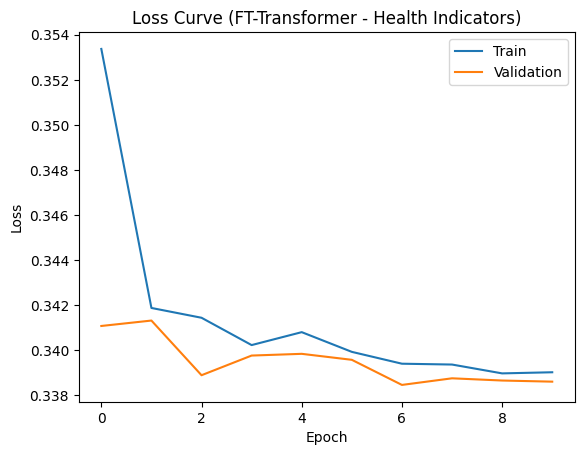

In [43]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Validation")
plt.title("Loss Curve (FT-Transformer - Health Indicators)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

20. Prediksi dan Evaluasi Model

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

@torch.no_grad()
def predict_labels():
    model_ft.eval()
    head.eval()
    logits_all = []

    for xb, _ in test_loader:
        xb = xb.to(device)

        # PENTING: x_cat HARUS None
        out = model_ft(xb, None)
        logits = head(out)

        logits_all.append(logits.cpu().numpy())

    logits_all = np.vstack(logits_all)
    probs = 1 / (1 + np.exp(-logits_all))
    preds = (probs > 0.5).astype(int).ravel()
    return preds

y_pred_ft = predict_labels()

print("Classification Report (Health - FT-Transformer)")
print(classification_report(y_test.values, y_pred_ft))

Classification Report (Health - FT-Transformer)
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     42741
           1       0.58      0.20      0.30      7995

    accuracy                           0.85     50736
   macro avg       0.73      0.59      0.61     50736
weighted avg       0.82      0.85      0.82     50736



21. Confusion Matrix

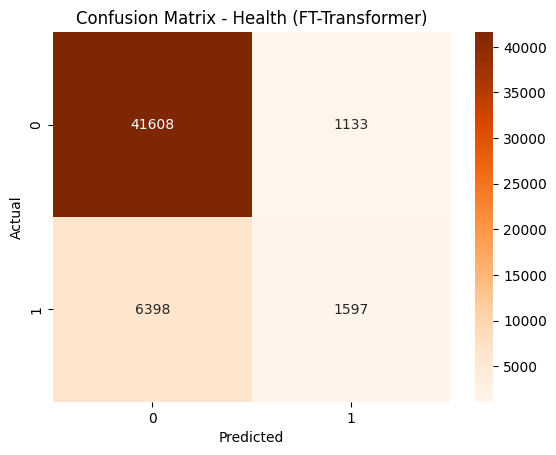

In [46]:
cm_ft = confusion_matrix(y_test.values, y_pred_ft)

sns.heatmap(cm_ft, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Health (FT-Transformer)")
plt.show()

22. SAVE MODEL

In [51]:
import json, joblib
from pathlib import Path

Path("models").mkdir(exist_ok=True)

# 1) Simpan scaler
joblib.dump(scaler, "models/scaler.pkl")

# 2) Simpan urutan kolom fitur (PENTING untuk input Streamlit)
feature_cols = X.columns.tolist()  # X = df.drop([...])
with open("models/feature_columns.json", "w") as f:
    json.dump(feature_cols, f, indent=2)

# 3) Simpan model MLP Health (pilih salah satu format di bawah)
model_mlp.save("models/mlp_health.keras")  # rekomendasi (format baru Keras)
# atau: model_mlp.save("models/mlp_health.h5")